# Day Trading Analysis and Optimization

## Introduction

This poject is an in depth analysis of a day trading strategy implemented by Uriel and Liran, last semester computer science students. In the project we wish to see which attributes are most effective, resulting in a preferable outcome, as well as optimization of the trategy for the purpose of achieving a market edge, futhermore create a foundation for algrorithmic trading.

Background:
During 2017-2019 Liran implemented a discretionary day trading strategy with real equity. As part of the process Liran collected some basic attributes for each trade such as float, sector, entry price relative to vwap and other fundamental and technical features. Some of the major conclusions are that trading performace is very much correlated with the general market and the entry price position relative to vwap and gap percent change also act as a strong predictors. here are some of the findings:

* Stocks with a gap percent change less than 1.38% tend to underperform.

* VWAP tag, which is a tag for the price position at the trade entry relative to the VWAP is crucial, meaning if the price is relatively distant from the VWAP indicator then the trade tends to underperform.

* Given VWAP tag is False if the SPY weekly change is above 0% we get slightly better results.

* Given VWAP TAG tag is not False we get better results if the gap SPY change is slightly above 0.

However, even with these conclusion some major drawbacks came along:

* The lack of data- the number of observations (trades) was only about 150.

* 95% percent of the data was inserted manually- which is why the amount and quality of attributes may have negatively affected the results.

* The trades taken present only a limited and specified period (1.5 years in 2017-2019).


The above brings us the the following...

Goals: 

* To see if the same results are repeated to support the hypothesis from the live trading in 2017-2019.
* Using more accurate 1 minute data for better data analysis.
* Measure different features ,and check which ones are strong predictors.
* Optimize the trategy based on the results.
* Use ML based on our observations for better decision making in future day trading.
* Create a foundation for algo-trading with a systematic approach as opposed to the discretionary approach used in this strategy.

Limitations and other important notes:

* The data downloaded for this project presents only the trades taken, meaning the analysis is only based on this data. This may result is biased results from non-indepenedent subset of stock picks whereas the general performance and analysis may vary using a different subset of stock picks based on a different set of rules.
* None of the trades taken involved real money.
* All of the trades were taken in a discretionary manner - no computer algorithm was used for entry/exit.
* The information presented in this project is by no means trading advice, please note the purpose of this projcet is to conduct research and draw insights only.






## Table of Contents

### [1) Strategy Description](#1)

### [2) Libraries](#2)


### [3) Data Import](#3)

#### [3.1 Application Functions Description](#3.1)

#### [3.2 Fundamentals](#3.2)

#### [3.3 Core Data](#3.3)

#### [3.4 Bar Data (OHLC)](#3.4)

### [4) Critical Data Extraction - Feature Engineering](#4)


### [5) Potentials](#5)


### [6) Target Data](#6)

### [7) EDA and Preprocessing](#7)

#### [7.1 Target Data](#7.1)

#### [7.2 Core Data](#7.2)

#### [7.3 Fundamental Data](#7.3)

#### [7.4 Critical Data](#7.4)

### [8) Dimensionality Reduction](#9)

### [9) Modeling](#9)

#### [9.1 Classification -  Winner/Loser](#9.1)

#### [9.2 Regression - Risk Reward Ration (R)](#9.2)

### [10) Optimization and Conclusions](#10)




<a id=1></a>

## 1) Strategy Description

#### Trade Picking Process:


Smalls caps are stocks with a market cap ranging between \\$250 million to \\$2 billion, these stocks bring a lot of attraction because of their tendency to move rapidly interday as a result of high volatility and liquidity as well as their low price (normally under 20\\$ per share). It is not unusual for such stocks to move 30-80\% in one day whereas the large volume stocks with high high volatility and liquidity tend to move on a single digit percent move. for a basic grasp we will present the following:

Let's say we wish to enter a trade with 10,000\\$ catcing a 10% move in a small cap stock at the a price of 6\\$, a feasible trade:

$10,000\$ \ \times \ 10\% = 11,000\$ $        $ \ \ \ \ \ \ \ \     \longrightarrow $ $ \ \ \ \ 1,000\$ \ $ in profits

Now let's say we wish to enter a trade with the same amount but on a large cap at the price of 60$ catching a 1.5\% move intraday.

$10,000\$ \ \times \ 1.5\% = 10,150\$ $        $ \ \ \ \ \ \ \ \     \longrightarrow $ $ \ \ \ \ 150\$ \ $ in profits


As traders with not much capital the latter is not a good option, which is why the focus this strategy on small caps.

Since the major moves happen on stocks with a large amount of buyers/sellers  bringing a tremendous amount of volume causing high volatility and rapid stock movements we filter stocks based on the following critiera:

* Relative volume above 1.5
* Daily volume is at least 200k and growing as the trading day progresses e.g 1mill at 10:00 am New York time.
* Market cap below \\$2 billion (small caps).
* 0.5\\$ - 15\\$ price range.

#### Trade Entry Decision Making:

After a selected amount of stocks were chosen based on the criteria above, we look for certain technical patterns signaling a potential rapid move in price. All entry share a similar pattern which is swift price move to the upside creating a "flag pole", following the "flag pole" we're expecting a correction pattern to take place, the correction pattern are the patterns listed below with relevant references for more info:

ST - symmetrical triangle ([Bulkowski Chart Pattern site - Symmetrical Triangles](http://thepatternsite.com/st.html))

DT - descending triangle ([Bulkowski Chart Pattern site - Descending Triangles](http://thepatternsite.com/dt.html))

AT - ascending trangle ([Bulkowski Chart Pattern site - Ascending Triangles](http://thepatternsite.com/at.html))

F - flag ([Bulkowski Chart Pattern site - Flags](http://thepatternsite.com/flags.html))

W - wedge ([[Bulkowski Chart Pattern site - Wedge](http://thepatternsite.com/fallwedge.html))

R - rectangle ([[Bulkowski Chart Pattern site - Rectangles](http://thepatternsite.com/recttops.html))

After a correction takes place we wait for a pattern breakout meaning we wait until a bar open is within the pattern and during the bar's period it will reach above the patterns top limit, the top limit is detemined with a trendline signaling the patterns frame.    
   <img src= "photo1.png"  width="220" height="220"/>






#####      <pre>                      An example of an ascending triangle pattern with a strong breakout. </pre>


#### Trade Exit Decision Making: 

Unlike the trade entry process, the exit process does not possess a one rule fits all. For the most part we'll exit a trade based on a single strong red bar that exhibits high volume and sometimes also the spy price position relative to vwap is considered. For example if after 10 minutes in a trade a strong red candle is presented alongside high relative volume and the spy price is below the SPY intraday vwap then we will most likely exit the trade because that is a signal for short and selling power. As mentioned this set of rules is not used consistenly and in this project we try to find a better exit strategy to optimize the trade, which is why we take a closer look at each trade's potential -  the potential highest high of a trade given it has not yet dropped back to the stop loss/ entry price, more will be covered in the project. 
 <img src= "photo2.png"  width="240" height="240"/>

#####      <pre>        An example of an ascending triangle pattern breakout entry with an exit at a high relative volume red bar. </pre>

<a id=2></a>

## 1) Libraries


In [1]:

import os 



import appfunctions as ap
import optfunctions as op


import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt #for data visualization
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


%matplotlib inline





<a id=2></a>

## 2) Data Collection

<a id=3></a>

## 3) Data Import


<a id=3.1></a>

### 3.1) Application Functions Description

In this section we present the functions used in the 'appfunctions' library. 

* addVwap - adds the daily volume weighed average price calculated with:

     $VWAP = \frac {\Sigma \  (Volume \  \times \  Price)}{Total \  Volume} $
     
     

* addGap -  adds the daily gap of a given OHLC bar calculated with:

     $Gap = \frac { \  ( Open \  Price \ - \  Last \  Close \  Price)}{Price}$
     
     

* addRelativeVolume -  add the relative volume of a given bar with a given period:

     $ Volume \ Average = \frac {\sum_{n = 1}^{Period} Volume}{Period}$

     $ Relative \ Volume = \frac {Volume}{Volume \ \ Average}$
     
     

* addBarTag - tags each bar with a specific shape resembelance such as green bar, red bar, green pin bar etc.




* graphViz - plots the OHCL chart with optional markers such as entry, exit etc.




* fillMissingBar - smooths the time series data with non-missing sequental bar data, in other words, fills missing bar data so that for each symbol and date 390 bars will be set.


* regPlot - plots continues data.


* disPlot - plots discrete data.


<a id=3.2></a>

### 3.2) Fundamentals


##### Raw:



|Term                  |Description                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Format |
|:-----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Date                   |the date in which the data was downloaded                                                                                                                                                                                                                                                                                                                                                                                                                             |date   |
|Symbol                 |symbol of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|priceToBook            |a ratio that expresses a company's stock share value divided by its book value per share                                                                                                                                                                                                                                                                                                                                                                              |ratio  |
|country                |the country location of the company                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|floatShares            |the portion of shares of a company that are in the hands of public investors                                                                                                                                                                                                                                                                                                                                                                                          |USD    |
|heldPercentInsiders    |the percentage of shares held by company insiders (board, management, those who are party to insider information)                                                                                                                                                                                                                                                                                                                                                     |percent|
|heldPercentInstitutions|the percentage of shares of a compnay held by institutions (mostly pension funds, insurance companies or investment banks)                                                                                                                                                                                                                                                                                                                                            |percent|
|marketCap              |the total value of all company's shares of stock. The number of shares multiplied by the value of one share of a stock                                                                                                                                                                                                                                                                                                                                              |USD    |
|netIncomeToCommon      |total net income to common stock holders. Calculated by: the total revenue of the company - total expenses - preferred dividends                                                                                                                                                                                                                                                                                                                                      |USD    |
|sector                 |the sector type of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                          |string |
|sharesOutstanding      |the total number of shares of a company                                                                                                                                                                                                                                                                                                                                                                                                                               |int    |
|sharesShort            |the number of shares of a stock currently sold short and not yet closed or covered (returned to the lender)                                                                                                                                                                                                                                                                                                                                                           |int    |
|shortPercentOfFloat    |percentage of short sales of a stock                                                                                                                                                                                                                                                                                                                                                                                                                                  |percent|
|enterpriseToEbitda     |a ratio used as a valuation tool to compare the value of a company, debt included, to the company’s cash earnings less non-cash expenses.<br>enterprise is the overall value of a company, the sum of the marketcap + debts + value of associate companies - cash and cash equivalents.<br>EBITDA stands for Earnings Before Interest, Taxes, Depreciations and Amortizations, meaning the earnings of a company prior to subtracting expenses like interests or taxes.|ratio  |



In [2]:
fundamentals = pd.read_excel("Fundamentals.xlsx")

fundamentals = fundamentals[["Date","Symbol","priceToBook","country","floatShares","heldPercentInsiders","heldPercentInstitutions"
,"marketCap", "netIncomeToCommon","sector","sharesOutstanding","sharesShort","shortPercentOfFloat","enterpriseToEbitda"]]

fundamentals["Date"] = fundamentals["Date"].apply(lambda x: x.date())

<a id=3.3></a>

### 3.3) Core Data

The Core data dataframe includes the data manually inserted for this project, each observation represents a trade and is added separately followed by the the trade's prices, times and tags presented in this table. The distinction of each trade can be seen looking at the data's keys: Symbol, Date, and Entry Time.


##### Raw:

|Term                 |Description                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Format |
|:-----------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Date                   |the date in which the trade took place                                                                                                                                                                                                                                                                                                                                                                                                                            |date   |
|Symbol                 |symbol of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|Entry            |the entry price of a given trade                                                                                                                                                                                                                                                                                                                                                                             |USD  |
|Entry Time                |the entry time of a given trade                                                                                                                                                                                                                                                                                                                                                                                                                                   |time | 
|SL            |stop loss price, if price exceeds this price to the downside sell immediately                                                                                                                                                                                                                                                                                                                                                                            |USD  |                          
|Exit            |the exit price of a given grade                                                                                                                                                                                                                                                                                                                                                                                          |USD    |
|Exit Time    |the exit time of a given trade                                                                                                                                                                                                                                                                                                                                                    |time|
|Pattern| the pattern tag (The correction pattern prior to breakout). See [1](#1)                                                                                                                                                                                                                                                                                                                                          |string|
|VWAP Tag              |the vwap tag. 'BO'-pattern breakout from  vwap or 'SUPPORT' - pattern supported by vwap. See [3.1](#3.1)                                                                                                                                                                                                                                                                                                                                          |string  |
|Catalyst      |a catalyst backing the trade. 'L' - leading sector/industry, 'H' - hype with no reason or 'C' - positive news catalyst                                                                                                                                                                                                                                                                                                                                  |string    |


##### Added Columns:


|Term                 |Description                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Format |
|:-----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Num                   | index for each trade, for easier data joins instead of using the 3 keys   |int|    


##### Feature Engineered:

Risk Reward Ratio:   $RRR = R = \frac {Exit \ Price \ - \ Entry \ Price}{Exit \ Price \ - \ Stop \  Loss}$.

If trade drops to stop loss $R = -1$, at breakeven  $R = 0$ and at profit $R > 0$.

|Term                 |Description                                                                                                                                                                                                                                                                                                                                                                                                                                       |Format |
|:-----------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Exit R                   | risk reward ratio at exit  |int|  

In [3]:
core_data = pd.read_excel("Core Data.xlsx")
core_data = core_data[core_data["Download"]!=0]
core_data["Date"] = core_data["Date"].apply(lambda x: x.date())
core_data["Entry Time"] = core_data["Entry Time"].apply(lambda x: datetime.datetime.strptime(x ,'%H:%M:%S').time())
core_data["Exit Time"] = core_data["Exit Time"].apply(lambda x: datetime.datetime.strptime(x ,'%H:%M:%S').time())
core_data["Num"] = pd.Series(np.arange(1,len(core_data)+1))

core_data["Exit R"] = (core_data["Exit"]-core_data["Entry"])/((core_data["Entry"]-core_data["SL"]))

In [4]:
core_data.sample(15)

Date  Download  Entry Entry Time   Exit Exit Time  Intended Entry  \
36  2021-04-06         1   5.94   09:52:00   6.09  10:23:00            5.94   
72  2021-04-27         1   5.65   10:28:00   5.42  10:49:00            5.65   
39  2021-04-07         1   2.63   09:44:00   2.64  10:04:00            2.63   
37  2021-04-06         1  12.50   10:35:00  12.35  10:42:00           12.50   
89  2021-05-05         1   5.41   09:58:00   5.63  09:59:00            5.41   
31  2021-04-05         1   4.15   10:20:00   4.18  10:56:00            4.15   
29  2021-04-05         1  14.20   10:17:00  13.75  10:23:00           14.20   
98  2021-05-14         1  11.93   09:57:00  11.95  09:58:00           11.93   
63  2021-04-22         1   7.45   10:44:00   7.23  11:15:00            7.45   
38  2021-04-06         1   3.38   10:18:00   3.33  10:19:00            3.38   
6   2021-03-24         1   4.10   10:11:00   4.15  10:27:00            4.10   
95  2021-05-13         1   4.03   09:59:00   4.19  10:03:00            4.03   
47  2021-04-13         1   1.89   10:30:00   1.94  10:37:00            1.89   
30  2021-04-05         1  13.83   10:47:00  13.75  10:55:00           13.83   
99  2021-05-14         1   8.80   10:02:00   8.92  10:43:00            8.80   

   Pattern     SL Strategy Symbol VWAP Tag Catalyst  Num    Exit R  
36      ST   5.77       BO   PAVM  SUPPORT        H   37  0.882353  
72      ST   5.42       BO   NTWK       BO        C   73 -1.000000  
39      DT   2.48       BO     IO  SUPPORT        C   40  0.066667  
37      ST  12.35       BO   TMST  SUPPORT        H   38 -1.000000  
89      DT   5.25       BO   ATNX       BO        C   90  1.375000  
31       F   4.05       BO   BCTX       BO        H   32  0.300000  
29      ST  13.75       BO   WKEY  SUPPORT        H   30 -1.000000  
98      ST  11.84       BO   GOGO  SUPPORT        H   99  0.222222  
63      ST   7.23       BO   OCGN  SUPPORT        C   64 -1.000000  
38      DT   3.33       BO    ODT  SUPPORT        H   39 -1.000000  
6       ST   4.05       BO    CPG       BO        L    7  1.000000  
95      ST   3.78       BO   RELI       BO        C   96  0.640000  
47       F   1.83       BO    LYL       BO        H   48  0.833333  
30       F  13.58       BO   WKEY       BO        H   31 -0.320000  
99      ST   8.68       BO   WISH  SUPPORT        H  100  1.000000

<a id=3.4></a>

### 3.4) Bar Data

Get the different bar (high, low, open, close and volume) datasets  and supplement them with relative volume, vwap bar tags and gap with the application functions mentioned above (see [3.1](#3.1)).


##### Raw:


|Term                 |Description                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Format |
|:-----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Datetime/Date                  |date and time/date of the bar                                                                                                                                                                                                                                                                                                                                                                                                                           |date and time/date  |
|High               |bar highest high                                                                                                                                                                                                                                                                                                                                                                                                                                                  |USD |
|Low           |bar lowest low                                                                                                                                                                                                                                                                                                                                                                       |USD  |
|Open                |bar open price                                                                                                                                                                                                                                                                                                                                                                                                                                   |USD|
|Close           |bar close price                                                                                                                                                                                                                                                                                                                                                                                          |USD    |
|Adj Close    |adjusted close, considers historical stock splits                                                                                                                                                                                                                                                                                                                                              |USD|









##### Feature Engineered:


|Term                 |Description                       |Time Period                      |Format |
|:-----------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------|:-------|
|RV                  |bar relative volume trailing 9 minutes back, see [3.1](#3.1)  |   1-minute       |ratio  |
|VWAP              |intraday volume weighted average price, see [3.1](#3.1)      | 1-minute           |USD |
|Bar Tag           |bar-candle shape specification            | all              |string|
|Gap               |bar gap prior to open, see [3.1](#3.1)       |1-day          |percent| 





##### Datasets:

yahoo_minute: 1 minute bar data from Yahoo

IB_minute: 1 minute bar data from IB

merged: 1 minute price data (high, low, open, close) from IB and volume from Yahoo

spy_minute: 1 minute bar data for spy from Yahoo

spy_d1: 1 day bar data for spy  from Yahoo

yahoo_h1: 1 hour bar data from Yahoo

yahoo_d1: 1 day bar data from Yahoo

In [5]:
%%time
sources = {"Yahoo Intraday Data":0,"IB Intraday Data":0,"Merged Intraday Data":0,"SPY Intraday Data":0,
          "Yahoo H1 Data":0, "Yahoo D1 Data":0,"SPY D1 Data":0}

core_path = os.getcwd()

i=0

for source in sources:
    path =  os.path.join(core_path,source)
    data = pd.DataFrame()
    for filename in os.listdir(path):


        file_path =  os.path.join(path , filename)

        df = pd.read_excel(file_path)
        symbol_name = filename.split()[0]
        df["Symbol"] = symbol_name
        min_per_session = 390
 
        if source == "Yahoo H1 Data" or source == "Yahoo D1 Data" or source== 'SPY D1 Data':

            # *********need to separate 1h periods!***********
            df["Date"] = df["Date"].apply(lambda x: x.date())

            
            # three months are 66 trading days (22 tracing days per month)
            three_months = 66
            df = ap.addRelativeVolume(df,period = three_months)
            
            df = ap.addGap(df)
        else:
            df["Datetime"] = df["Datetime"].apply(lambda x: datetime.datetime.strptime(x , '%Y%m%d  %H:%M:%S'))
            df["Date"] = df["Datetime"].apply(lambda x: x.date())
            df["Time"] = df["Datetime"].apply(lambda x: x.time())
            df = df.drop(columns = ["Datetime"])
            
            
            # apply the feature engineering function
            df = ap.addVwap(df)
            df = ap.addBarTag(df)
            df = ap.addRelativeVolume(df)

            df = ap.fillMissingBar(df)
            
        data = data.append(df,ignore_index = True)
        
    sources[source]=data

# The datasets after importing and changes
yahoo_minute =sources["Yahoo Intraday Data"]
IB_minute =sources["IB Intraday Data"]
merged = sources["Merged Intraday Data"]
spy_minute = sources["SPY Intraday Data"]      
                                        
yahoo_h1 = sources["Yahoo H1 Data"]
yahoo_d1 = sources["Yahoo D1 Data"]

spy_d1 =sources["SPY D1 Data"] 




Wall time: 14min 41s


#### Plot the two smoothed  data sources 'yahoo minute data' and 'IB minute data' with the added features



In [6]:
d1 = yahoo_minute[yahoo_minute["Symbol"]=="RVPH"].copy()
ap.graphViz(d1)



In [7]:
d2 = IB_minute[IB_minute["Symbol"]=="RVPH"].copy()
ap.graphViz(d2)

#### Plot a D1 chart example

In [8]:
d3 = yahoo_d1[yahoo_d1["Symbol"]=="CLEU"].copy()
ap.graphViz(d3,period = "Date",end = datetime.date(2021,1,1))

#### Intraday Data Pick - why we use only yahoo minute data from now onwards

The core data table is based on manualy inserted trades, where the decision of entering a specific trade is based using the TWS Intractive Brokers trading platform, which is why the IB minute data downloaded with the IB api was crucial. Suprisingly However, the data downloaded from IB with the api seems to be poor compared to the yahoo minute data. I have come to this conclusion after comparing the data sometimes bar by bar. 

The 'merged data' is a dataset with prices (open,high,close, low ) from IB and volume from Yahoo. The 'merged data' came to compensate for the poor volume data from IB because IB uses many filters to their volume data making it close to impossible to work with in terms of accuracy. 

This brings us to the conclusion that 'merged data' and 'IB minute data' will not play a part in this project for the reasons mentioned above.

#### Merge the minute data , spy minute data with the core data and compute the RRR - risk reward ratio for each bar

$RRR = R = \frac {Exit \ Price \ - \ Entry \ Price}{Exit \ Price \ - \ Stop \  Loss}$ 

In [9]:
# change the spy data columns names

selected_spy_minute = spy_minute.drop(columns  = ["Symbol","Adj Close","Date","Time"])

selected_spy_minute = selected_spy_minute.add_prefix('spy_')
selected_spy_minute[["Date","Time"]] = spy_minute[["Date","Time"]]

# compute the RRR for symbol minute data and merge it with the core data table
yahoo_minute_R = yahoo_minute.merge(core_data, on = [ "Date","Symbol"], how = "left")

yahoo_minute_R["High R"] =(yahoo_minute_R["High"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])
yahoo_minute_R["Low R"] = (yahoo_minute_R["Low"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])
yahoo_minute_R["Close R"] = (yahoo_minute_R["Close"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])
yahoo_minute_R["Open R"] = (yahoo_minute_R["Open"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])

# merge all of the mentioned above to a fully merged dataset
df_merged = yahoo_minute_R.merge(selected_spy_minute, on = ["Date","Time"],how = "left")
df_merged=df_merged.round(3)

#### Check Missing Values

In [10]:
df_merged.isnull().sum()



index                0
Open                 0
High                 0
Low                  0
Close                0
Adj Close         1188
Volume               0
Symbol               0
Date                 0
Time                 0
VWAP                 0
Bar Tag              0
RV                   0
Download             0
Entry                0
Entry Time           0
Exit                 0
Exit Time            0
Intended Entry       0
Pattern              0
SL                   0
Strategy             0
VWAP Tag             0
Catalyst             0
Num                  0
Exit R               0
High R               0
Low R                0
Close R              0
Open R               0
spy_index            2
spy_Open             2
spy_High             2
spy_Low              2
spy_Close            2
spy_Volume           2
spy_VWAP             2
spy_Bar Tag          2
spy_RV               2
dtype: int64

Drop the 'Adj Close' columns becasue we do not need the adjusted historical prices, we need to address a price that was present at a certian date without any adjustments for the future, it is not relevant if stock splits too place between now and then.

In [11]:
df_merged = df_merged.drop(columns = ["Adj Close"])

<a id=4></a>

## Critical Data

In this section we will add additional features extracted from the data which may have an impact on the outcome of a given trade.


##### Feature Engineered:


|Term                 |Description                                        |Format |
|:-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Gap               |bar gap prior to open, see [3.1](#3.1)               |percent| 
|spy_Gap               |bar SPY gap prior to open, see [3.1](#3.1)                 |percent| 
|Sum Volume at Entry    |the sum the volume from market open at 9:30 until the trade entry of a given symbol |percent| 

In [12]:
critical_data = core_data[["Symbol","Num","Date"]].copy()

#### Get the week and month  SPY and symbol percent change
This feature is ment to give a global perspective on the general market bias and the given stocks bias (bullish/bearish).

In [13]:
# extract D1 percent change

def percentChange(symbol,date,period,data):
    
    first = []
    while len(first)==0:
        per_delta = datetime.timedelta(days = period)
        first = data[(data["Date"]==(date-per_delta)) & (data["Symbol"]==symbol)]
        period +=1

    first_open = first["Open"].values[0]   
    last = data[(data["Date"]==date) & (data["Symbol"]==symbol)]    
    last_open = last["Open"].values[0]    
    change = last_open-first_open

    percent_change = (change/first_open)*100
    return percent_change
    
week = 7
month = 30
new_critical_data = critical_data.copy()

new_critical_data["Week Change"] = critical_data.apply(lambda x: percentChange(
                                                               symbol =x["Symbol"] ,
                                                               date = x["Date"],
                                                               period = week,
                                                               data  = yahoo_d1),                                                               
                                                               axis=1)  
                                                       
new_critical_data["Month Change"] = critical_data.apply(lambda x: percentChange(
                                                               symbol =x["Symbol"] ,
                                                               date = x["Date"],
                                                               period = month,
                                                               data  = yahoo_d1),                                                               
                                                               axis=1)
                                                        
new_critical_data["spy_Week Change"] = critical_data.apply(lambda x: percentChange(
                                                               symbol ="SPY" ,
                                                               date = x["Date"],
                                                               period = week,
                                                               data  = spy_d1),                                                               
                                                               axis=1) 
                                                        
                                                        
new_critical_data["spy_Month Change"] = critical_data.apply(lambda x: percentChange(
                                                               symbol ="SPY" ,
                                                               date = x["Date"],
                                                               period = month,
                                                               data  = spy_d1),                                                               
                                                               axis=1)
# length warning
if len(critical_data)!=len(new_critical_data):
    print("**** WARNING! the gap_critical_data data and critical data lenths do not match! **** ")
critical_data=new_critical_data

#### Get Symbol Gap Percent Change

In [14]:
gap_critical_data = critical_data.merge(yahoo_d1[["Gap","Symbol","Date"]],on = ["Date","Symbol"],how = "inner")
gap_critical_data = gap_critical_data.drop_duplicates(subset = ["Date","Symbol","Num"])

# length warning
if len(critical_data)!=len(gap_critical_data):
    print("**** WARNING! the gap_critical_data data and critical data lenths do not match! **** ")
critical_data=gap_critical_data




#### Get SPY Gap Percent Change

In [15]:
spy_d1_copy = spy_d1.copy()

spy_d1_copy.rename(columns = {'Gap':'spy_Gap'}, inplace = True)

gap_spy_critical_data = critical_data.merge(spy_d1_copy[["spy_Gap","Date"]],on = ["Date"],how = "left")





# length warning
if len(critical_data)!=len(gap_spy_critical_data):
    print("**** WARNING! the gap_critical_data data and critical data lenths do not match! **** ")
critical_data=gap_spy_critical_data

#### Sum Volume at Entry 

The sum the volume from market open at 9:30 until the trade entry of a given symbol.

In [16]:
#volume at entry
q1 = df_merged[
    (df_merged["Entry Time"]>=df_merged["Time"]) ].copy()

q1["Sum Volume at Entry"] = q1["Volume"]

q2 = q1[["Num","Sum Volume at Entry"]].groupby("Num").sum().reset_index()



new_critical_data = critical_data.merge(q2, on ="Num",how= "inner")

if len(new_critical_data )!=len(critical_data):
    print("********* WARNING! critical data length is not the same after  the changes 1********")
critical_data=new_critical_data




#### Get the 66 days relative volume at entry time (in progress)

In [17]:
temp_d1 = yahoo_d1.copy()

temp_d1["RV 66"]=temp_d1["RV"]
new_critical_data = critical_data.merge(temp_d1[["Date","Symbol","RV 66"]],on = ["Date","Symbol"])
new_critical_data = new_critical_data.drop_duplicates(subset = ["Date","Symbol","Num"])



if len(new_critical_data )!=len(critical_data):
    print("********* WARNING! critical data length is not the same after the changes *********")
critical_data = new_critical_data 


#### Entry relative distance to VWAP


In [18]:
#volume at entry
q1 = df_merged[
    (df_merged["Entry Time"]>=df_merged["Time"]) ].copy()

q2 = q1.groupby(by="Num").min()

q2 = q2[["Low"]].reset_index()

q3 = df_merged[
    (df_merged["Entry Time"]==df_merged["Time"]) ].copy()

q3=q3[["Num","VWAP","Entry"]].merge(q2,on = ["Num"])
q3["VWAP rd"] =(q3["Entry"]-q3["Low"])/ (q3["VWAP"]-q3["Low"])

new_critical_data = critical_data.merge(q3[["Num","VWAP rd"]], on = ["Num"])

if len(new_critical_data )!=len(critical_data):
    print("********* WARNING! critical data length is not the same after  the changes 1********")

critical_data=new_critical_data

<a id=5></a>

## Potentials

#### Potential

The Potential price is detemined by the highest high a given trade reached until it touched the stop loss or the day ended.

In [19]:
core_data["Potential"] = 0
core_data["Potential R"] = 0
core_data["Potential Time"]=0

q1 = df_merged[
    (df_merged["Entry Time"]<=df_merged["Time"]) ].copy()
limit = 1

for num in q1["Num"].unique():
    
    q2 = q1[q1["Num"] ==num].reset_index()

    
    flag_above_limit = 0
    potential = 0
    potential_index = 0
    for index, row in q2.iterrows():

        if row["High"]>potential:
            potential_index = index
            potential = row["High"]

        #create some buffer
        
        if (row["Low"]<=(row["SL"]) and (index>=1))  or row["Exit Time"]==row["Entry Time"]:
            break

    core_data.loc[core_data["Num"]==num,["Potential"] ]= q2.loc[potential_index,"High"]
    core_data.loc[core_data["Num"]==num,["Potential R"]] = q2.loc[potential_index,"High R"]
    core_data.loc[core_data["Num"]==num,["Potential Time"]] = q2.loc[potential_index,"Time"]

#### Plot an example of the intraday data with Entry, Exit, Potential 

In [20]:

plot_data = yahoo_minute.merge(core_data,on = ["Symbol","Date"],how = "inner")
d1 = plot_data[plot_data["Num"]==52].copy()
ap.graphViz(d1,point_list=["SL","Entry","Exit","Potential"])

<a id=6></a>

## Target Data

In this section we will create the dataset that will hold the data for prediciton and optimization:

|Term                 |Description                                        |Format |
|:-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Exit R               |risk reward ratio at exit, see [3.3](#3.3)               |RRR| 
|is_winner               |discretization of the 'Exit R' values, if 'Exit R'>0 then 1 else 0  |ratio| 
|Potential R   |risk reward ratio at potential price, see [5](#5) |ratio| 






In [21]:
target_data = core_data[["Symbol","Num","Date","Exit R","Potential R"]].copy()

# drop the target columns from core_data to avoid merge clashes with target_data
core_data = core_data.drop(columns =["Exit R","Potential R" ])

target_data["Outcome"] = target_data["Exit R"].apply(lambda x: 'Winner' if x >=0 else "Loser" )

target_data

Symbol  Num        Date    Exit R  Potential R Outcome
0     CPRX    1  2021-03-22 -1.000000        0.250   Loser
1     KXIN    2  2021-03-22  2.333333        3.000  Winner
2      SDH    3  2021-03-22  2.000000        3.100  Winner
3     JFIN    4  2021-03-24 -1.000000        0.079   Loser
4     PIXY    5  2021-03-24  5.625000        7.500  Winner
..     ...  ...         ...       ...          ...     ...
105   TYME  106  2021-05-20  1.000000        4.000  Winner
106   PDSB  107  2021-05-20  0.916667       11.917  Winner
107   PRPO  108  2021-05-20  0.583333        2.667  Winner
108   LFMD  109  2021-05-20 -1.000000        0.905   Loser
109   GLNG  110  2021-05-21 -1.000000        1.286   Loser

[110 rows x 6 columns]

<a id=7></a>

## 7) EDA and Preprocessing


Here we will visualize the data and attempt to draw first inference from the data, then preprocess the data.

##### Separate train-test

here we separate train and test to make our preprocess decisions based on the train data only.

In [22]:
train_count = round(len(target_data)*(2/3))

train = target_data.sample(train_count,random_state = 0)
test = pd.concat([target_data, train, train]).drop_duplicates(keep=False)

train['train']=1
test['train']=0

target_data = pd.concat([test,train]).sort_index()

<a id=7.1></a>

### 7.1) Target Data

In [23]:
# add a dummy variable for outcome, winner is now 1 and loser is 0. Call it 'is_winner'

target_data["is_winner"]  = target_data["Outcome"].apply(lambda x: 1 if x=="Winner" else 0)

target_data.describe()

Num      Exit R  Potential R       train   is_winner
count  110.000000  110.000000   110.000000  110.000000  110.000000
mean    55.500000   -0.022201     2.464782    0.663636    0.409091
std     31.898276    1.370368     5.670169    0.474627    0.493916
min      1.000000   -1.000000    -0.833000    0.000000    0.000000
25%     28.250000   -1.000000     0.340750    0.000000    0.000000
50%     55.500000   -0.414286     1.000000    1.000000    0.000000
75%     82.750000    0.625833     2.558250    1.000000    1.000000
max    110.000000    5.962963    53.200000    1.000000    1.000000

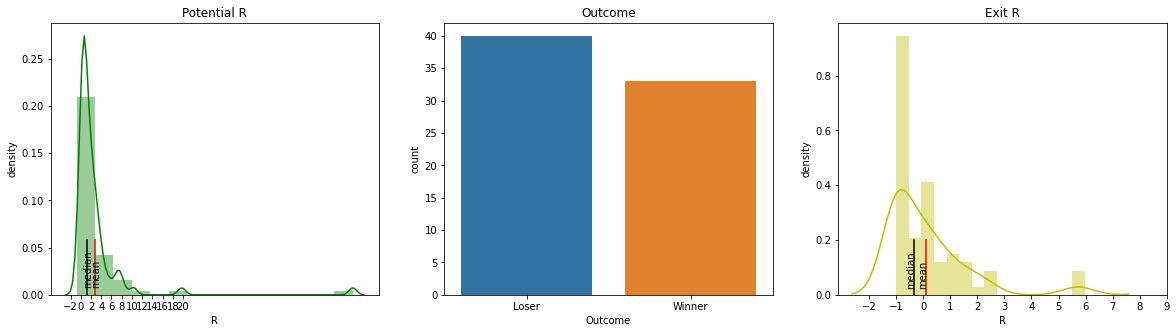

In [24]:
train = target_data[target_data["train"]==1].copy()



f,axes=plt.subplots(1,3,figsize=(20,5))

# first plot
g1 = sns.distplot(a=train[["Potential R"]],bins = 15,ax = axes[0] ,color="g")
axes[0].set_xticks(np.arange(-2,21,2))
axes[0].axvline(x=train["Potential R"].mean(),color = "r", ymin=0, ymax=0.2)
axes[0].text(train["Potential R"].mean()-0.8,0.01,'mean',rotation=90)
axes[0].axvline(x=train["Potential R"].median(),color = "black", ymin=0, ymax=0.2)
axes[0].text(train["Potential R"].median()-0.8,0.01,'median',rotation=90)
axes[0].set_xlabel('R')
axes[0].title.set_text('Potential R')
axes[0].set_ylabel('density')



# seocnds plot
g2 = sns.countplot(x="Outcome",data=train,ax=axes[1])
axes[1].title.set_text('Outcome')

# third plot
g3 = sns.distplot(a=train[["Exit R"]],bins = 15,ax = axes[2],color = "y")
axes[2].axvline(x=train["Exit R"].median(),color = "black", ymin=0, ymax=0.2)
axes[2].text(train["Exit R"].median()-0.3,0.03,'median',rotation=90)
axes[2].axvline(x=train["Exit R"].mean(),color = "r", ymin=0, ymax=0.2)
axes[2].text(train["Exit R"].mean()-0.3,0.03,'mean',rotation=90)
axes[2].set_xticks(range(-2,10))
axes[2].title.set_text('Exit R')
axes[2].set_ylabel('density')
axes[2]=axes[2].set_xlabel('R')


##### Inference:



As one can see, we get a skewed distribution in both 'Exit R' and 'Potential R' with some outliers in the far right.
A trade with a high R is considered a good trade which is which we will reduce the outliers to a price which is still high but not too high to avoid falsley manipulating our analysis and models.

In the next cell we'll lower high values above 10 in 'Potential R'  to 10 and high values above 4 in 'Exit R' to 4.




##### Plot the changes:

In [25]:


target_data["Potential R"] = target_data["Potential R"].apply(lambda x: 10 if x>10 else x)
target_data["Exit R"] = target_data["Exit R"].apply(lambda x: 4 if x>4 else x)

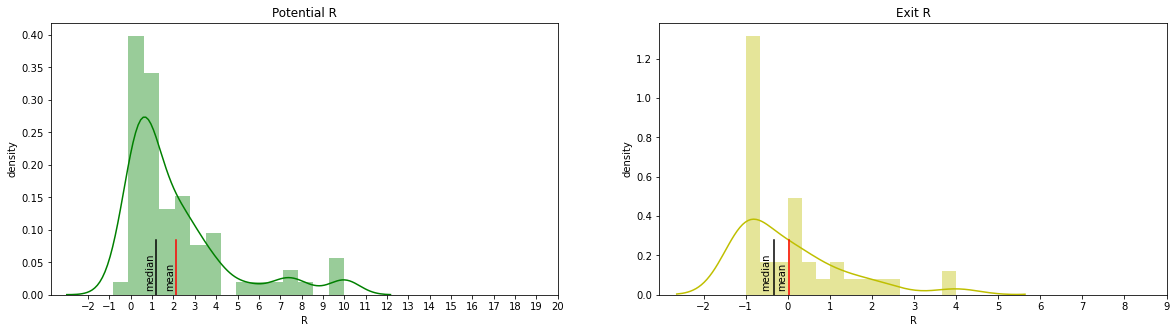

In [26]:
#override the the old train after the changes
train = target_data[target_data["train"]==1]

f,axes=plt.subplots(1,2,figsize=(20,5))

# first plot
g1 = sns.distplot(a=train[["Potential R"]],bins = 15,ax = axes[0] ,color="g")
axes[0].set_xticks(range(-2,21))
axes[0].axvline(x=train["Potential R"].mean(),color = "r", ymin=0, ymax=0.2)
axes[0].text(train["Potential R"].mean()-0.5,0.01,'mean',rotation=90)
axes[0].axvline(x=train["Potential R"].median(),color = "black", ymin=0, ymax=0.2)
axes[0].text(train["Potential R"].median()-0.5,0.01,'median',rotation=90)
axes[0].title.set_text('Potential R')
axes[0].set_ylabel('density')
axes[0].set_xlabel('R')

# second plot
g2 = sns.distplot(a=train[["Exit R"]],bins = 15,ax = axes[1],color = "y")
axes[1].axvline(x=train["Exit R"].median(),color = "black", ymin=0, ymax=0.2)
axes[1].text(train["Exit R"].median()-0.3,0.03,'median',rotation=90)
axes[1].axvline(x=train["Exit R"].mean(),color = "r", ymin=0, ymax=0.2)
axes[1].text(train["Exit R"].mean()-0.3,0.03,'mean',rotation=90)
axes[1].set_xticks(range(-2,10))
axes[1].title.set_text('Exit R')
axes[1].set_ylabel('density')
axes[1] =axes[1].set_xlabel('R')

<a id=7.2></a>

### 7.2) Core Data

In [27]:
core_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            110 non-null    object 
 1   Download        110 non-null    int64  
 2   Entry           110 non-null    float64
 3   Entry Time      110 non-null    object 
 4   Exit            110 non-null    float64
 5   Exit Time       110 non-null    object 
 6   Intended Entry  110 non-null    float64
 7   Pattern         110 non-null    object 
 8   SL              110 non-null    float64
 9   Strategy        110 non-null    object 
 10  Symbol          110 non-null    object 
 11  VWAP Tag        110 non-null    object 
 12  Catalyst        110 non-null    object 
 13  Num             110 non-null    int32  
 14  Potential       110 non-null    float64
 15  Potential Time  110 non-null    object 
dtypes: float64(5), int32(1), int64(1), object(9)
memory usage: 14.2+ KB


In [28]:
core_data.describe()

Download       Entry        Exit  Intended Entry          SL  \
count     110.0  110.000000  110.000000      110.000000  110.000000   
mean        1.0    6.031227    6.037745        6.031227    5.864864   
std         0.0    3.883361    3.897921        3.883361    3.803769   
min         1.0    0.635000    0.652000        0.635000    0.615000   
25%         1.0    2.607500    2.595000        2.607500    2.500000   
50%         1.0    5.070000    5.250000        5.070000    4.895000   
75%         1.0    8.800000    8.740000        8.800000    8.660000   
max         1.0   15.130000   15.440000       15.130000   14.850000   

              Num   Potential  
count  110.000000  110.000000  
mean    55.500000    6.385827  
std     31.898276    4.089363  
min      1.000000    0.760000  
25%     28.250000    2.812500  
50%     55.500000    5.525000  
75%     82.750000    9.537500  
max    110.000000   16.120000

In [29]:
def reg_plot(col,data):
    
    fig,ax = plt.subplots(1,4 ,figsize = (20,7))
    fig.subplots_adjust(wspace=0.3)
    fig.suptitle(col,fontsize = 22)


    ax[0] = sns.regplot(x=col, y="Exit R", data=data,ax = ax[0],x_jitter=.2, color = "g")

    ax[1] = sns.regplot(x=col, y="Potential R", data=data,ax = ax[1],x_jitter=.2, color = "y")


    ax[2] = sns.violinplot(x="Outcome", y=col,data=data, palette="muted",cut = 0,ax = ax[2])
    ax[2]= sns.pointplot(x ="Outcome", y=col, data=data,join=False
                         ,ci = None, estimator=np.mean,ax = ax[2],markers=["_", "_"]
                         ,scale =2,color = "w",order = ["Winner","Loser"])
    
    
    ax[3] = sns.distplot(a=data[[col]],bins = 20,ax = ax[3])
    #ax[3].set_xticks(np.arange(0,20,2))

    ax[3].set_ylabel('density')
    ax[3] = ax[3].set_xlabel(col)
    
def dis_plot(col,data):
    sns.set_style("whitegrid")
    f,axes=plt.subplots(1,3,figsize=(20,6))
    f.suptitle(col,fontsize=22)
    g1 = sns.countplot(x=col,data=data,palette="muted",ax=axes[0])
    f.subplots_adjust(hspace=0.2)
    axes[0].tick_params(axis='x')


    #plot 2
    g3 =sns.boxplot(x=col, y="Exit R", data=data, palette="muted",ax=axes[1],showmeans=True)

    axes[1].tick_params(axis='x')
    
    g3 =sns.boxplot(x=col, y="Potential R", data=data, palette="muted",ax=axes[2],showmeans=True)

    axes[2].tick_params(axis='x')


    #plot 4
   # g2= sns.violinplot(x=col,y="Potential R",palette="muted",data=data,ax=axes[3])
   # axes[3].tick_params(axis='x')

<a id=7.2.1></a>

#### 7.2.1) Numerical Values

Here we exhibit the relationship between the entry price and the outcomes.

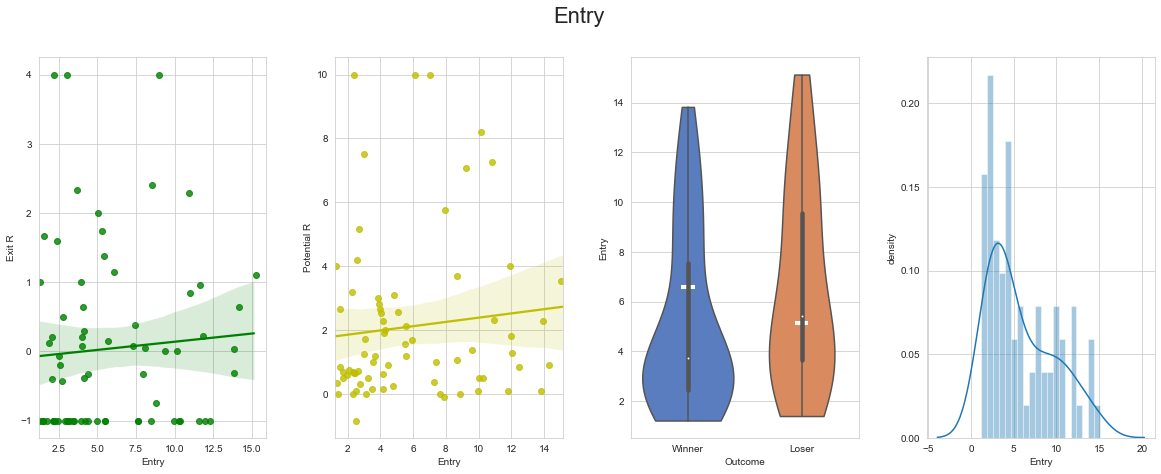

In [37]:
plot_df = core_data[["Num","Entry","Pattern","Catalyst","VWAP Tag"]].copy()

plot_df = plot_df.merge(train[["Num","Outcome","Potential R","Exit R"]],on = ["Num"], how = "inner")


ap.regPlot("Entry",plot_df)



##### Inference:

In is very difficult to draw inference from the plots because the regression-plot presents a flat line where the observations are scattered with no bias. Also the violin plot for 'Winner' and 'Loser' seem to be very similar.

We'll normalize the 'Entry' values.

<a id=7.2.2></a>

#### 7.2.2) Discrete Values

In [38]:
plot_df

Num  Entry Pattern Catalyst VWAP Tag Outcome  Potential R    Exit R
0     1   4.89       W        C       BO   Loser        0.250 -1.000000
1     2   3.67       F        H       BO  Winner        3.000  2.333333
2     3   4.88       F        H       BO  Winner        3.100  2.000000
3     4  11.72       F        H       BO   Loser        0.079 -1.000000
4     5   3.08       F        C       BO  Winner        7.500  4.000000
..  ...    ...     ...      ...      ...     ...          ...       ...
68  101   2.69       F        C       BO  Winner        5.167  0.500000
69  102   7.95      ST        C       BO  Winner        5.762  0.047619
70  103   3.34      ST        H  SUPPORT   Loser        0.500 -1.000000
71  106   1.40      ST        H       BO  Winner        4.000  1.000000
72  110  11.98      ST        C       BO   Loser        1.286 -1.000000

[73 rows x 8 columns]

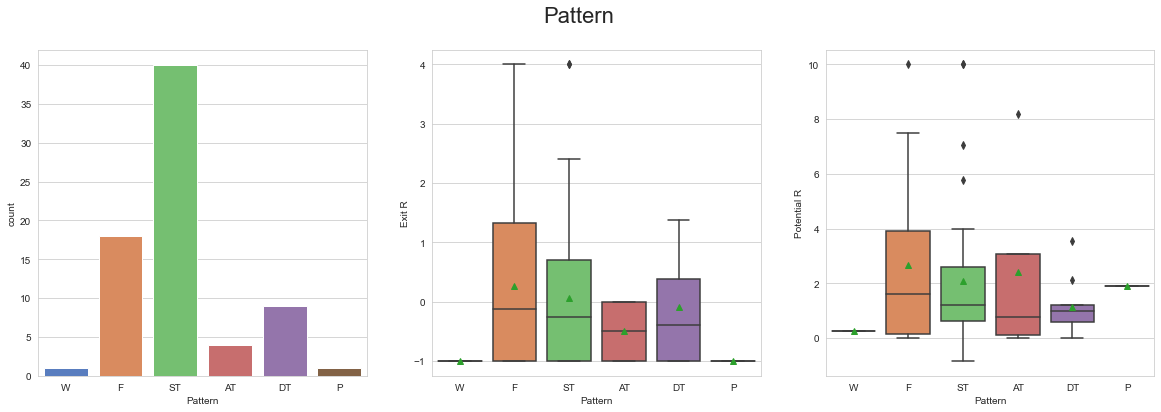

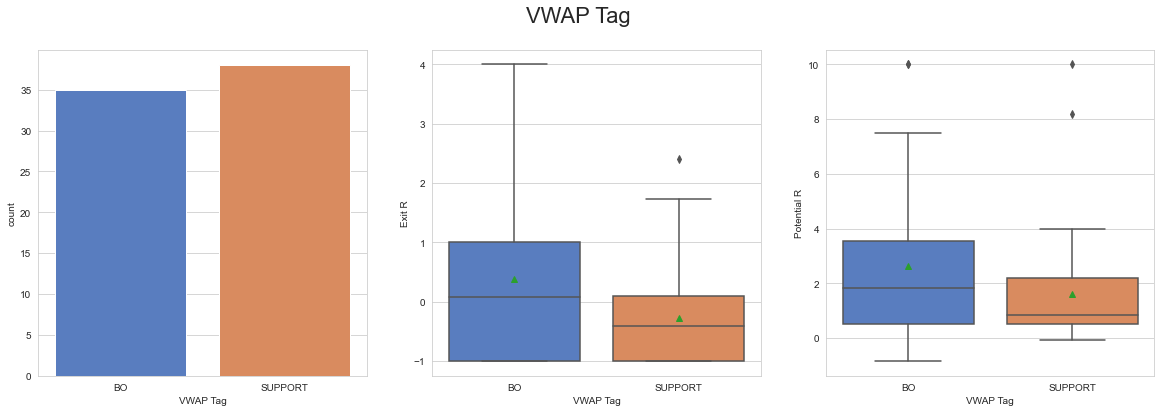

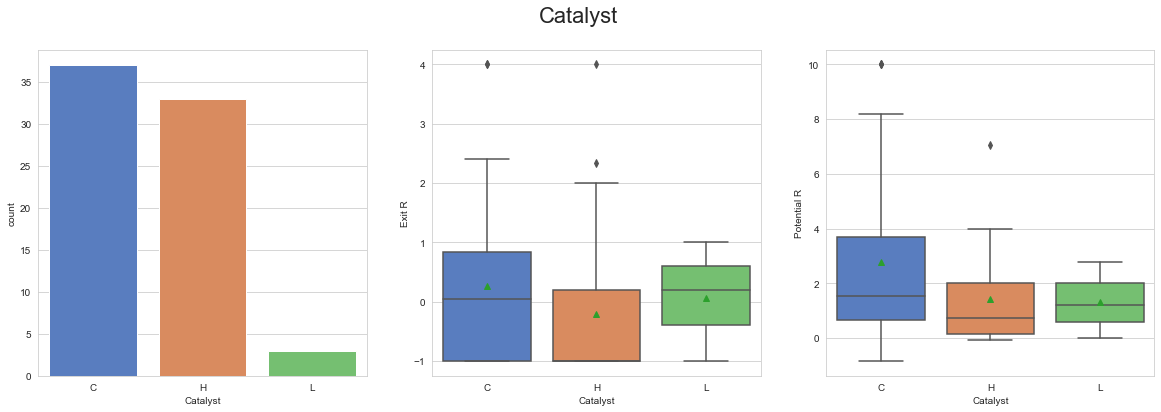

In [39]:


    
ap.disPlot("Pattern",plot_df)

ap.disPlot("VWAP Tag",plot_df)
ap.disPlot("Catalyst",plot_df)

##### Inference:

<a id=7.3></a>

### 7.3) Fundamentals

In [40]:
fundamentals.describe()

priceToBook   floatShares  heldPercentInsiders  \
count    59.000000  8.600000e+01            88.000000   
mean     11.475071  6.295442e+07             0.197656   
std      35.709884  8.029741e+07             0.207823   
min       0.979892  4.429750e+05             0.000000   
25%       1.861811  1.505371e+07             0.028133   
50%       3.281369  3.710583e+07             0.118920   
75%       6.331859  8.890020e+07             0.338048   
max     209.984220  5.292242e+08             0.896040   

       heldPercentInstitutions     marketCap  netIncomeToCommon  \
count                88.000000  8.900000e+01       8.700000e+01   
mean                  0.247913  5.877160e+08      -9.387132e+07   
std                   0.247754  9.462660e+08       2.503062e+08   
min                   0.000000  1.660561e+07      -2.012417e+09   
25%                   0.051618  8.548063e+07      -6.640048e+07   
50%                   0.168150  2.354773e+08      -2.258900e+07   
75%                   0.354482  5.340053e+08      -5.241117e+06   
max                   1.057870  5.471871e+09       7.498300e+07   

       sharesOutstanding   sharesShort  shortPercentOfFloat  \
count       8.900000e+01  8.900000e+01            75.000000   
mean        8.444775e+07  5.098399e+06             0.067264   
std         9.336541e+07  7.974035e+06             0.058156   
min         7.719620e+05  5.382000e+03             0.000600   
25%         2.282710e+07  4.843660e+05             0.023250   
50%         5.402500e+07  1.767277e+06             0.056300   
75%         1.177670e+08  6.259640e+06             0.090500   
max         5.303650e+08  3.850428e+07             0.278800   

       enterpriseToEbitda  
count           85.000000  
mean            -9.332529  
std             32.141154  
min           -146.242000  
25%            -12.785000  
50%             -4.735000  
75%             -0.524000  
max             73.638000

In [41]:
fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     89 non-null     object 
 1   Symbol                   89 non-null     object 
 2   priceToBook              59 non-null     float64
 3   country                  89 non-null     object 
 4   floatShares              86 non-null     float64
 5   heldPercentInsiders      88 non-null     float64
 6   heldPercentInstitutions  88 non-null     float64
 7   marketCap                89 non-null     int64  
 8   netIncomeToCommon        87 non-null     float64
 9   sector                   89 non-null     object 
 10  sharesOutstanding        89 non-null     int64  
 11  sharesShort              89 non-null     int64  
 12  shortPercentOfFloat      75 non-null     float64
 13  enterpriseToEbitda       85 non-null     float64
dtypes: float64(7), int64(3), obj

In [44]:

plot_df = fundamentals.copy().round(3)

plot_df = plot_df.merge(train[["Date","Symbol","Num","Outcome","Potential R","Exit R"]]
                        ,on = ["Date","Symbol"], how = "inner")

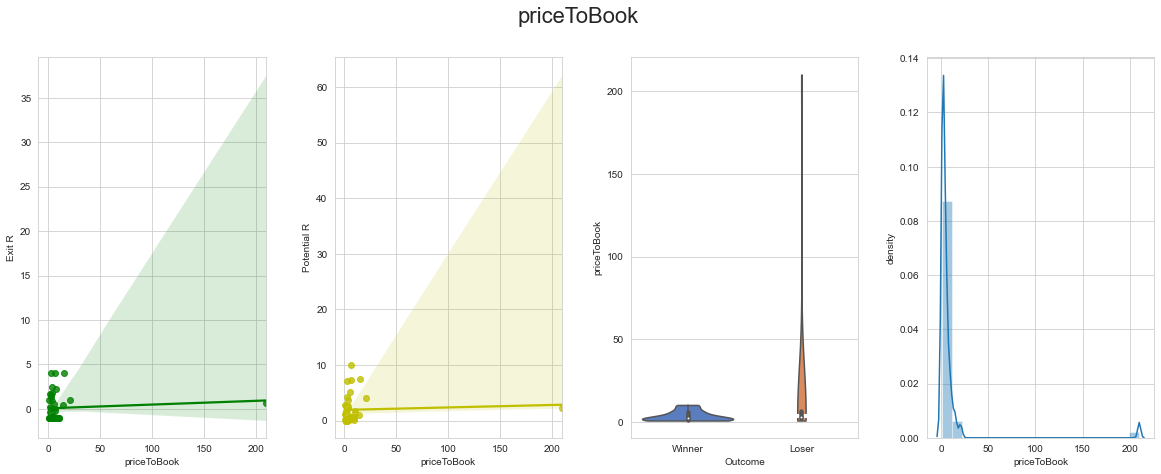

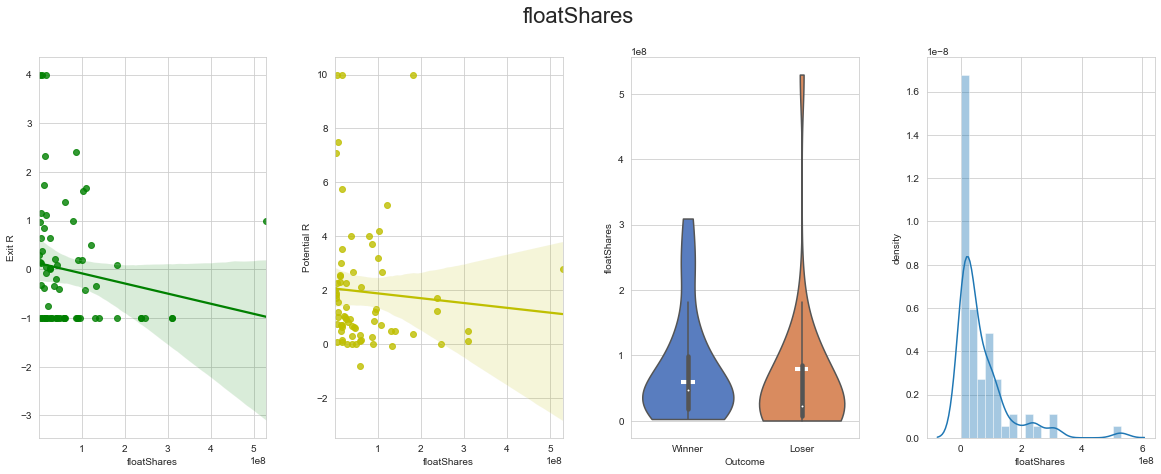

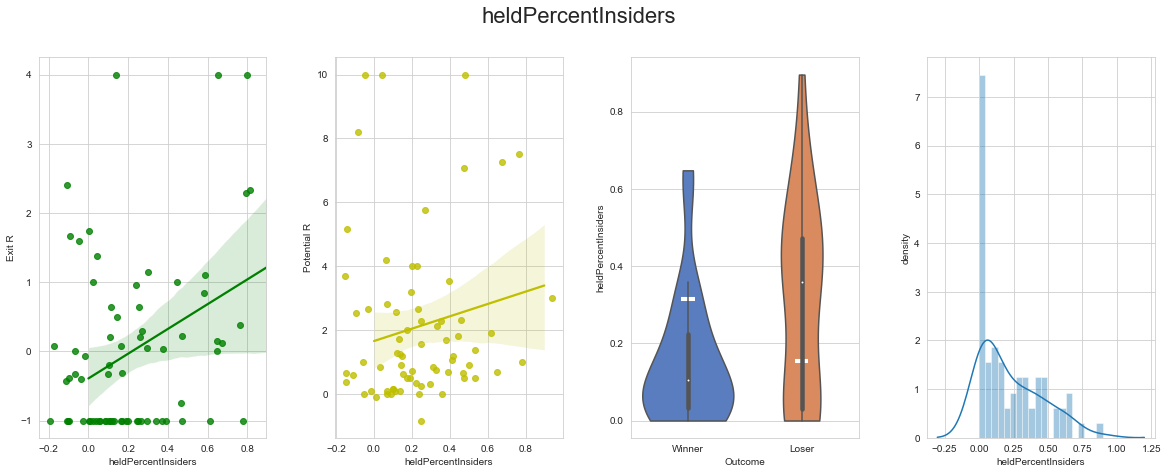

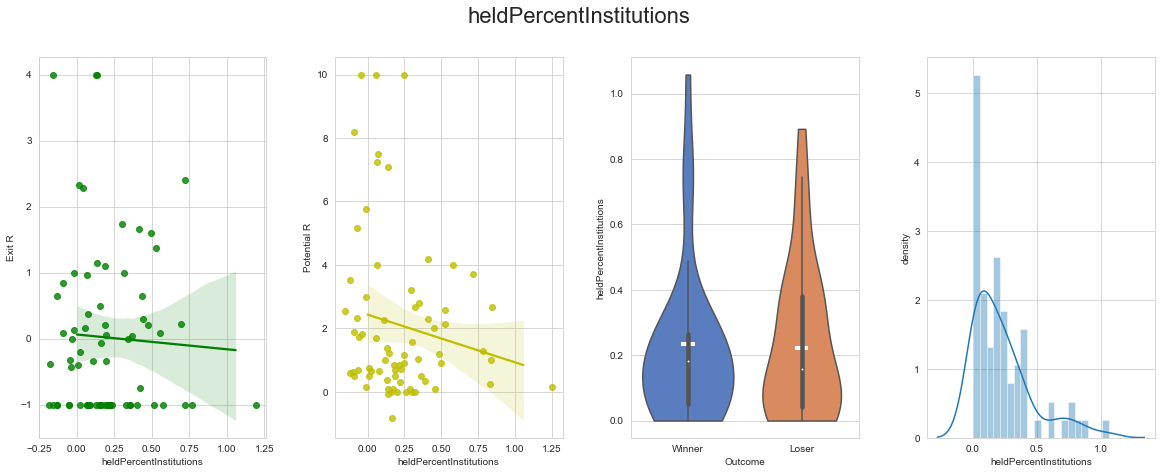

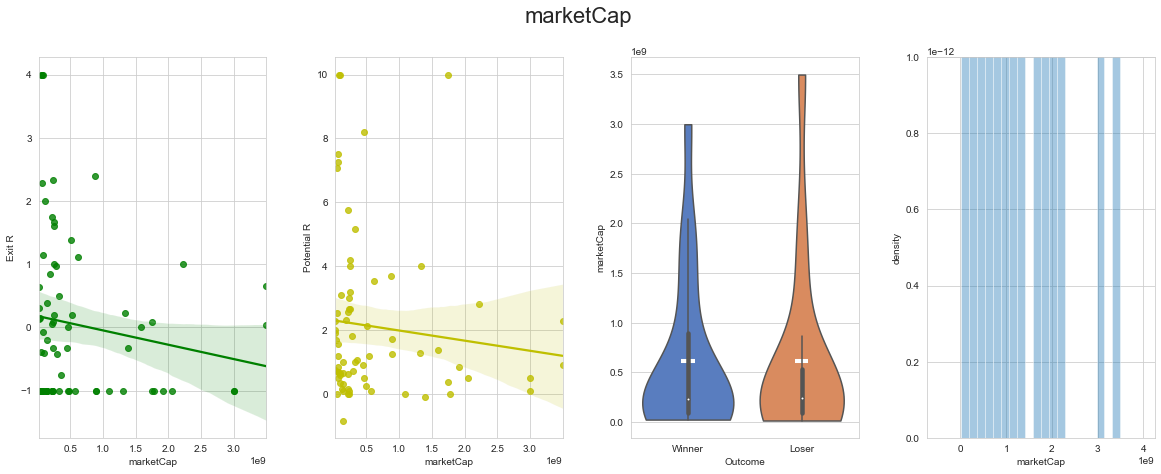

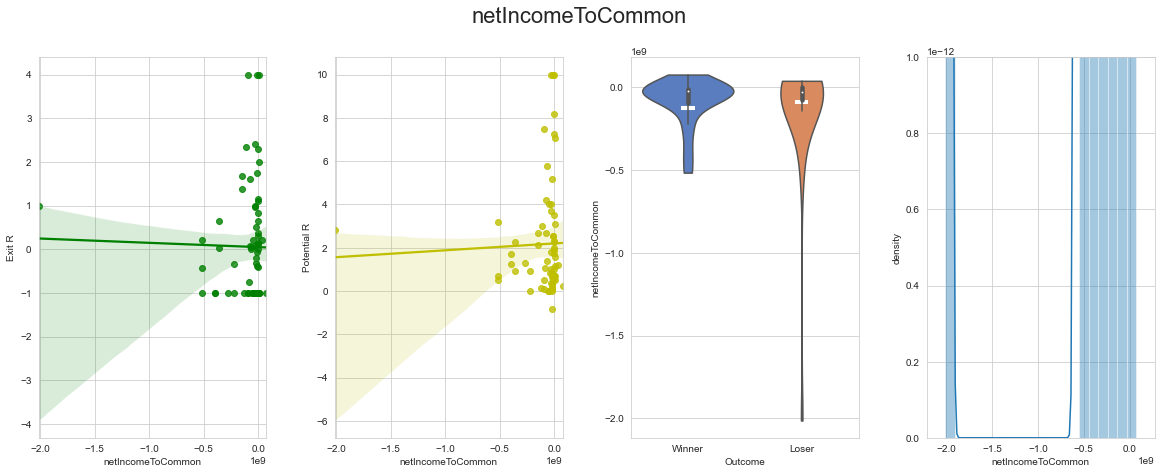

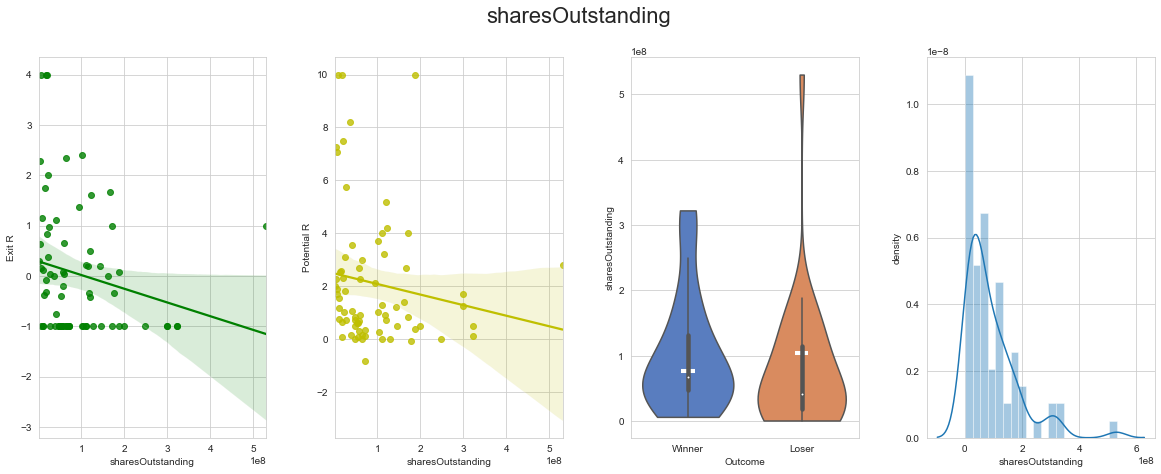

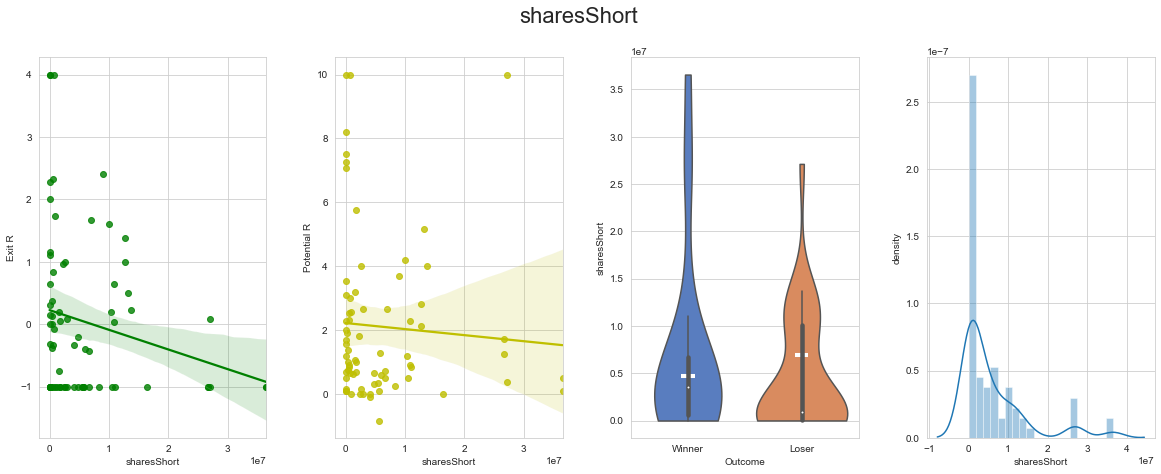

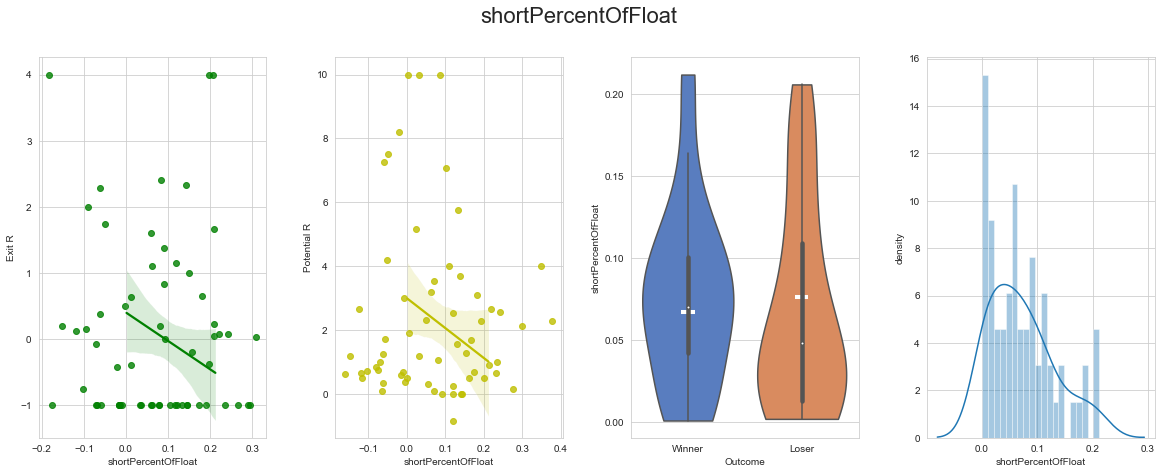

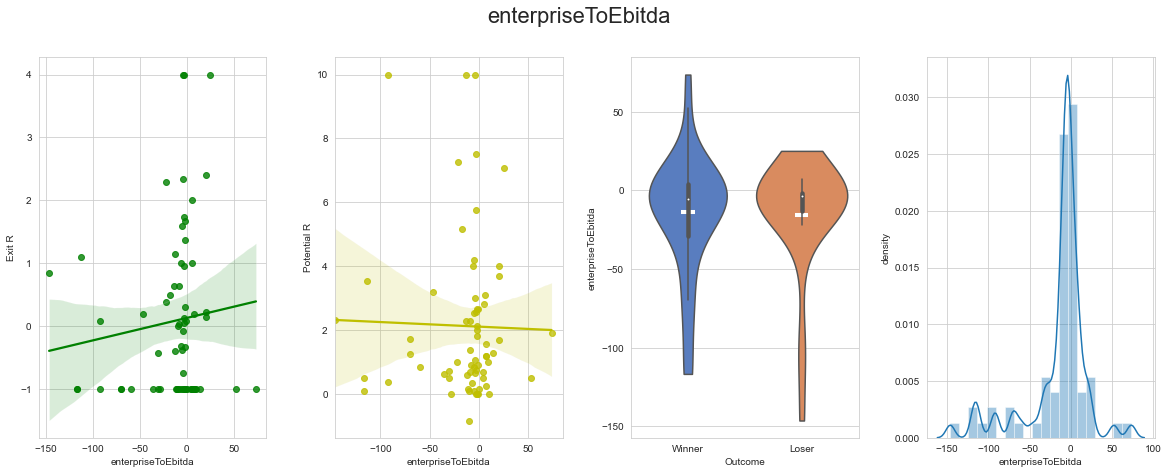

In [45]:
columns = ['priceToBook','floatShares',
       'heldPercentInsiders', 'heldPercentInstitutions', 'marketCap',
       'netIncomeToCommon', 'sharesOutstanding', 'sharesShort',
       'shortPercentOfFloat', 'enterpriseToEbitda']

for col in columns:
    ap.regPlot(col,plot_df)

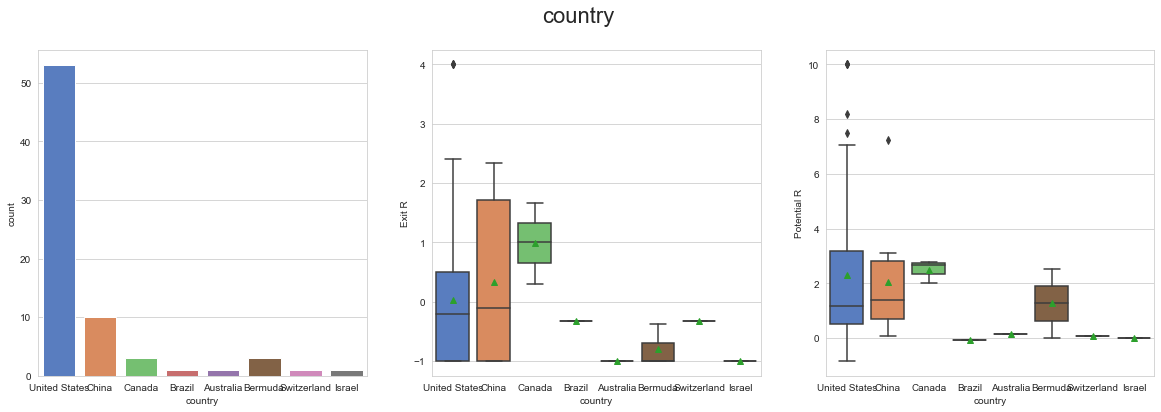

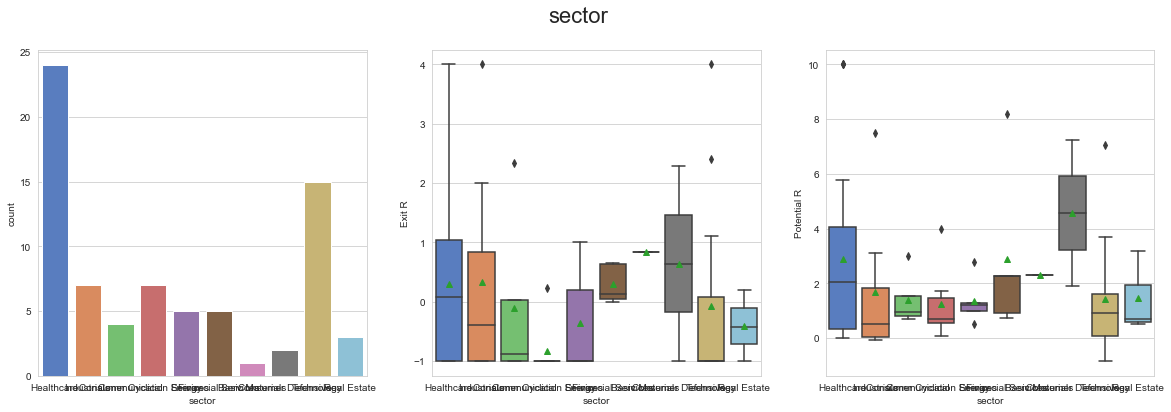

In [56]:
columns = ["country","sector"]

for col in columns:
    ap.disPlot(col,plot_df)

<a id=7.4></a>

### 7.4) Critical Data

In [57]:
critical_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Symbol               110 non-null    object 
 1   Num                  110 non-null    int32  
 2   Date                 110 non-null    object 
 3   Week Change          110 non-null    float64
 4   Month Change         110 non-null    float64
 5   spy_Week Change      110 non-null    float64
 6   spy_Month Change     110 non-null    float64
 7   Gap                  110 non-null    object 
 8   spy_Gap              110 non-null    object 
 9   Sum Volume at Entry  110 non-null    float64
 10  RV 66                110 non-null    object 
 11  VWAP rd              110 non-null    object 
dtypes: float64(5), int32(1), object(6)
memory usage: 10.7+ KB


In [58]:
# change the type from numpy.float64 to a regular float
critical_data[["Gap","spy_Gap","RV 66","VWAP rd"]] = critical_data[["Gap","spy_Gap","RV 66","VWAP rd"]].apply(pd.to_numeric)

In [59]:
plot_df = critical_data.copy()

plot_df = plot_df.merge(train[["Num","Outcome","Potential R","Exit R"]],on = ["Num"], how = "inner")

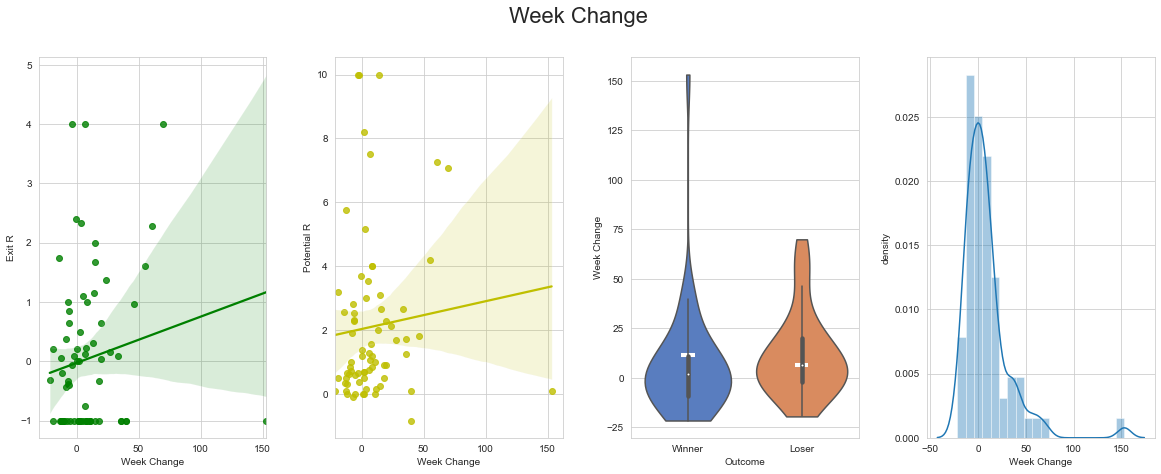

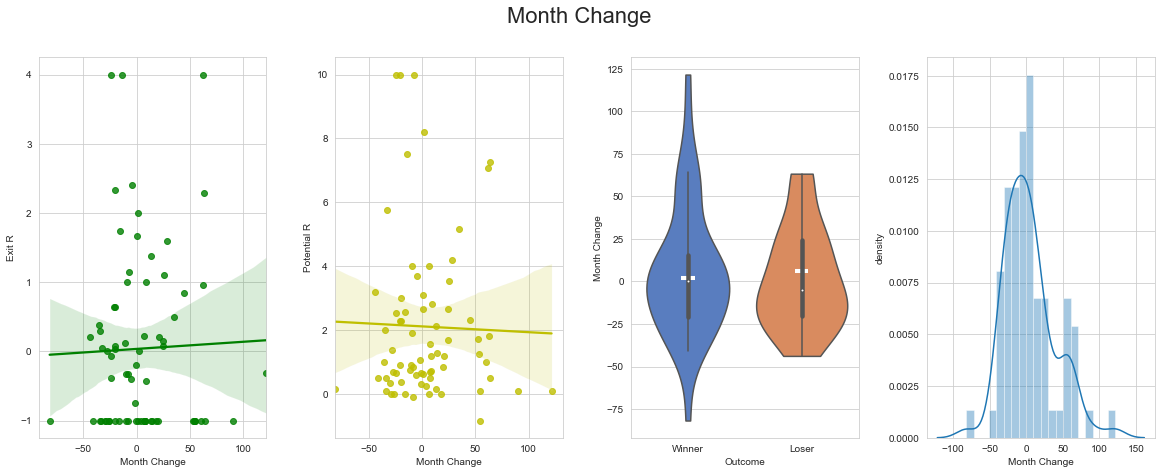

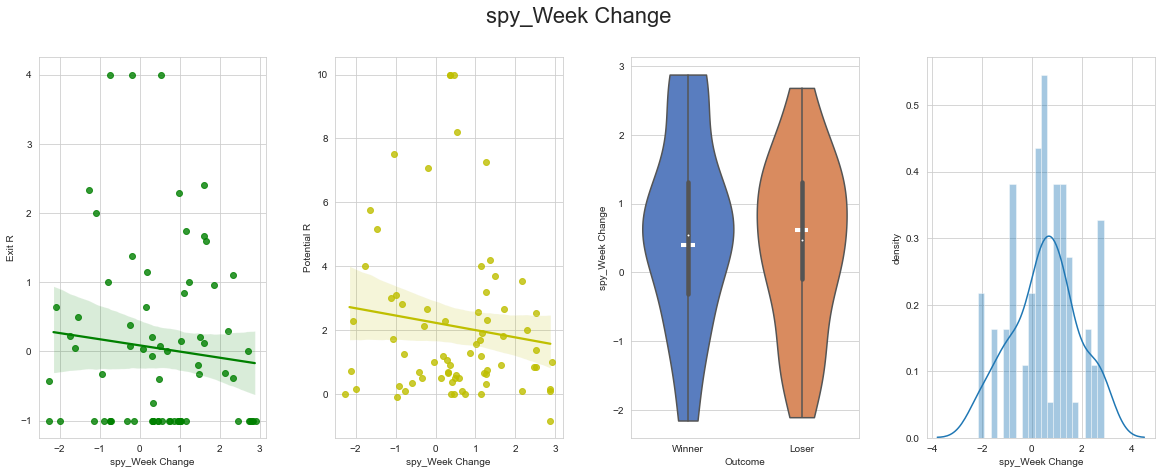

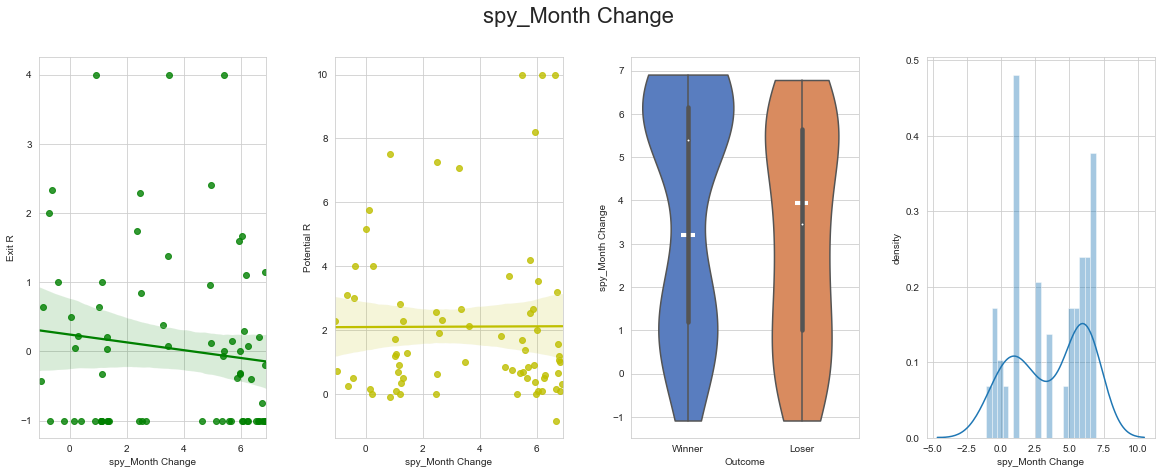

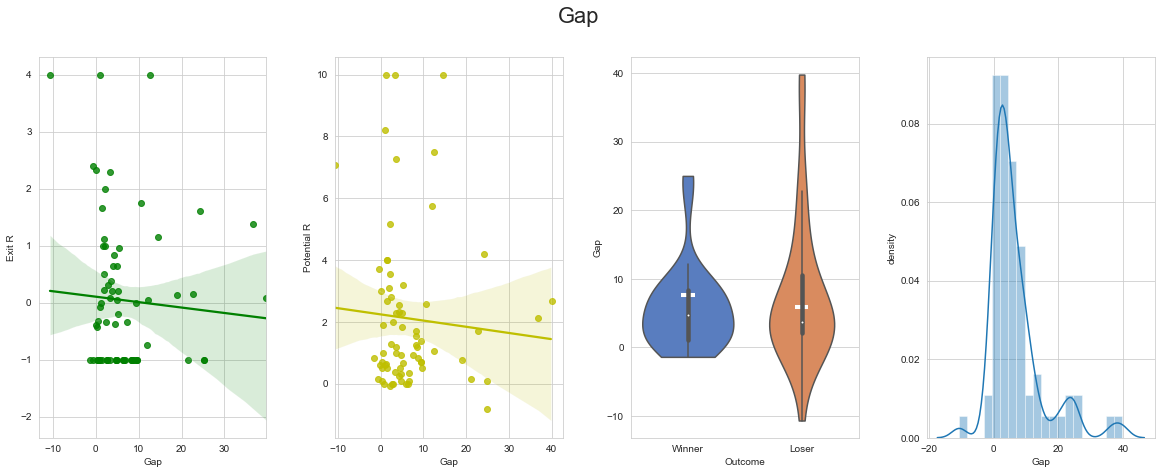

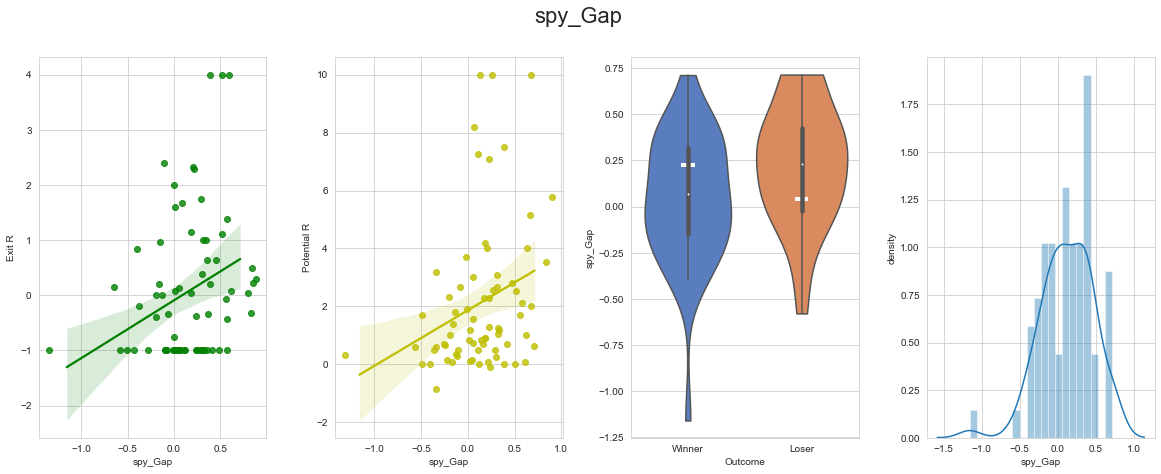

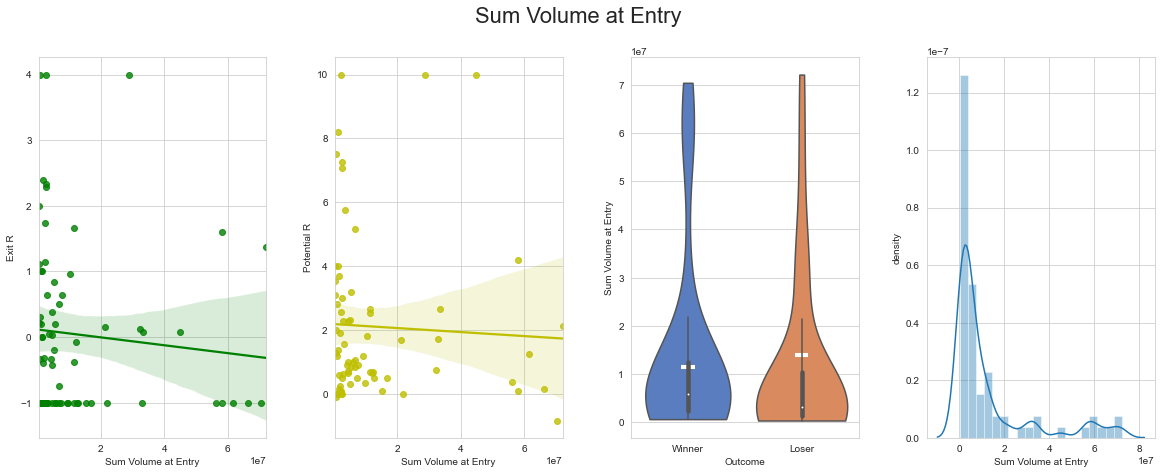

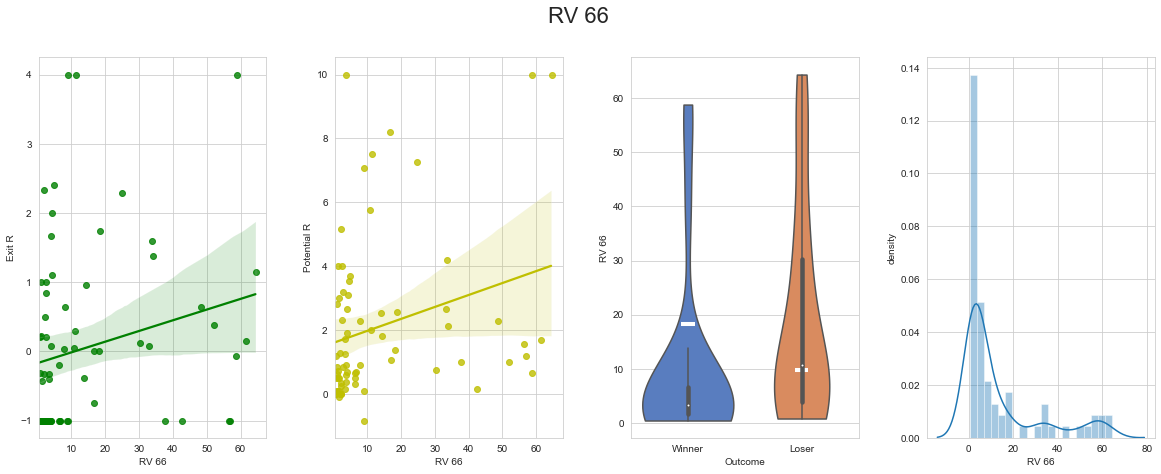

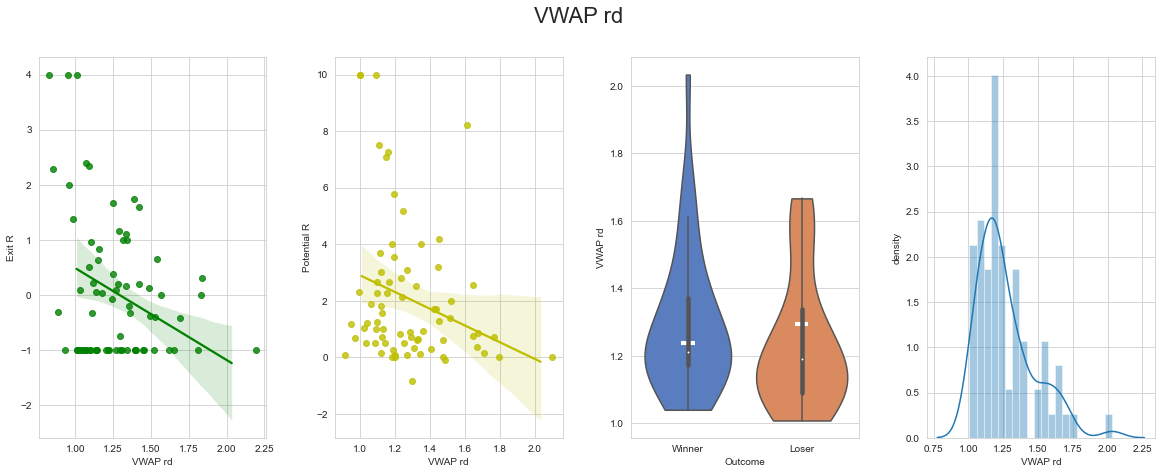

In [60]:
columns = plot_df.drop(columns = ["Symbol","Num","Date","Outcome","Potential R","Exit R"]).columns


for col in columns:

    ap.regPlot(col,plot_df)


<a id=8></a>

## 8) Dimensionality Reduction

As seen in the EDA section some features seems to have no impact on the target variables, here we would like to filter some of the feature creating a framework for modeling.

<a id=9></a>

## 9) Modeling

The main purpose of this section is to analyze the feature's impact on the trade's outcome in terms of risk rewars ratio (R) and a binary outcome (winner or loser) and create models for prediction for better decision making while live trading, building the models that will act later as filters for a systematic aproach - algo trading.

In [61]:
df_model = core_data.copy()
df_model = df_model.merge(train, on = ['Symbol','Date','Num'])
df_model = df_model.merge(fundamentals, on = ['Symbol','Date'])
df_model = df_model.merge(critical_data, on = ['Symbol','Date', 'Num'])

df_model = df_model.drop(columns = ['Date', 'Download', 'Entry Time', 'Exit', 'Exit Time',
                                    'Intended Entry', 'SL', 'Strategy', 'Symbol',
                                    'Num', 'Potential', 'Potential Time','Outcome'])


#****remove na only for a general model presentation, needs to be removed after preprocessing!!!!!*****
df_model = df_model.dropna(how='any')

discrete = ["sector",'country','Catalyst','VWAP Tag','Pattern']



In [62]:
df_model  =  pd.get_dummies(df_model,columns = discrete, prefix=['sector','Catalyst','country', 'Pattern','VWAP Tag'])

<a id=9.1></a>

### 9.1 Classification -  Winner/Loser

In [63]:
y = df_model[["is_winner"]]

# drop the target row and the target rows for the regression models
X = df_model.drop(columns = ["is_winner","Exit R","Potential R"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
kfold = StratifiedKFold(n_splits=5)


random_state = 3



classifier_dict = {}
classifier_dict["SVC"]=SVC(random_state=random_state)
classifier_dict["Ada Boost"]=AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)
classifier_dict["Random Forest"]=RandomForestClassifier(random_state=random_state)
classifier_dict["Extra Trees"] = ExtraTreesClassifier(random_state=random_state)
classifier_dict["Desicion Tree"] = DecisionTreeClassifier(random_state=random_state)
classifier_dict["Logistic Regression"] =LogisticRegression(random_state=random_state)


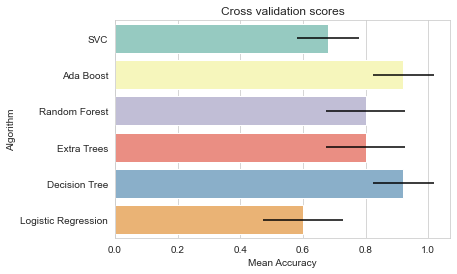

In [65]:
cv_results = []
for clf in classifier_dict :
    cv_results.append(cross_val_score(classifier_dict[clf], X_train, y =   y_train.values.flatten(), scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","Ada Boost","Random Forest","Extra Trees","Decision Tree","Logistic Regression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [66]:
for clf in classifier_dict :
    print(clf + " Accuracy:")
    model = classifier_dict[clf].fit(X_train, y_train.values.flatten())
    score = model.score( X_test, y_test)
    print(score)

SVC Accuracy:
0.38461538461538464
Ada Boost Accuracy:
0.6923076923076923
Random Forest Accuracy:
0.46153846153846156
Extra Trees Accuracy:
0.46153846153846156
Desicion Tree Accuracy:
0.6923076923076923
Logistic Regression Accuracy:
0.6153846153846154


<a id=9.2></a>

### 9.2) Regression - Risk Reward Ration (R)

In [67]:

regression_dict = {}
classifier_dict["Linear Regression"] =LinearRegression()

### 9.3) Hyper Paramater Tuning

<a id=10></a>

## 10) Optimization and Conclusions

In this section we will try to optimize the strategy using a different set of rules, and calculate the mean and median 'Realized R' and use them as an indication.

### 10.1 Set and Forget at k R

A simple set and forget strategy with take profit at k R, else consier it a loser trade with R = -1.




In [68]:


opt = target_data[["Date","Symbol","Num","Potential R"]].copy().reset_index()
opt = opt.merge(core_data[["Num","VWAP Tag","Catalyst"]],on = ["Num"])
opt = opt.reset_index()

grid_k = np.arange(0.5,10,0.1)
SandF_df = pd.DataFrame(columns = ["mean","median","std"])
for k in grid_k:

    result = op.o1(opt,k,df_merged)
    SandF_df=SandF_df.append({"k":k,'mean': result[0],"median":result[1],"std":result[2]}, ignore_index=True)


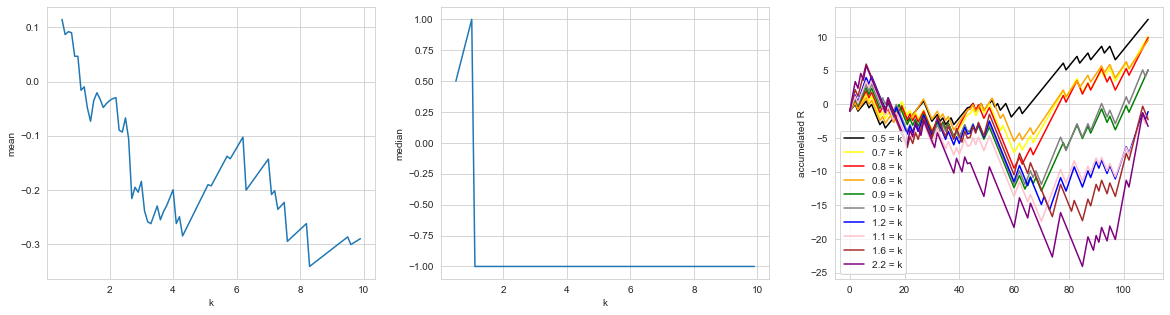

In [69]:
f,axes=plt.subplots(1,3,figsize=(20,5))

g1 = sns.lineplot(data=SandF_df, x="k", y="mean",ax = axes[0])
g2 = sns.lineplot(data=SandF_df, x="k", y="median",ax = axes[1])


top_10 = SandF_df.sort_values("mean",ascending = False).head(10)
color=[ "black","yellow","red","orange","green","grey","blue","pink","brown","purple"]
color_i = 0

for k in top_10["k"]:
    k = round(k,1)   
    opt["Sum o1-"+str(k)+" R"] = opt["o1-"+str(k)+" R"].rolling(len(opt),min_periods = 1).sum()
    g3 = sns.lineplot(data=opt, x=opt.index, y="Sum o1-"+str(k)+" R",ax = axes[2],color =color[color_i])
    color_i = color_i+1
    
top_10["k"]  =  top_10["k"].round(1).apply(lambda x:str(x)+" = k") 
g3.legend(top_10["k"])

g3 =g3.set_ylabel("accumelated R")

#### Set and Forget at k R with break even limit (Less Risk):
Similar to Set and Forget at k where k is take profit, here we include another feature to limit our risk.
Break even limit means if price bypassed a certain R , say limit=1,1.5,2... and then goes straight back to entry price then exit at entry price + 0.01 $ buffer (to potentialy cover comissions and a security buffer), this way we limit our risk and avoid price reaching the stop loss. 

We create a grid of limits with limits of 1,1.5 and 2 with a similar grid for k as seen in the Set and Forget method above.

In [70]:
%%time

opt = core_data[["Date","Symbol","Num","SL","Entry","Catalyst","VWAP Tag"]].copy()
opt =opt.merge(target_data[["Num","Potential R"]], on = ["Num"],how = "inner")
opt = opt.reset_index()


grid_k = np.arange(0.5,10,0.1)
grid_limit = np.arange(1,2.5,0.5)
SandF_df = pd.DataFrame(columns = ["mean","median","std"])
for k in grid_k:
    for limit in grid_limit:
        if k>limit:

            result =op.o2(opt,limit,k,df_merged)
            SandF_df=SandF_df.append({"k":k,"limit":limit,'mean': result[0],"median":result[1],"std":result[2]}, ignore_index=True)

Wall time: 5min 10s


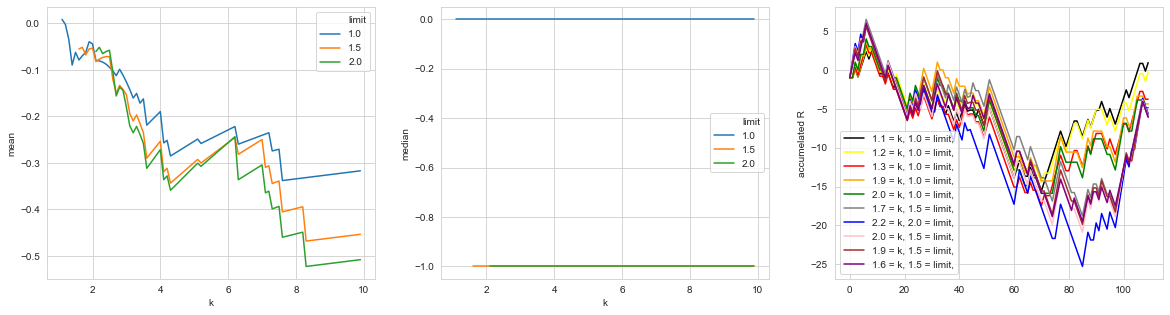

In [71]:
f,axes=plt.subplots(1,3,figsize=(20,5))

temp = SandF_df.copy()
temp["limit"] = temp["limit"].astype('category')
g1 = sns.lineplot(data=temp, x="k", y="mean",hue="limit",ax = axes[0])
g2 = sns.lineplot(data=temp, x="k", y="median",hue="limit",ax = axes[1])


top_10 = SandF_df.sort_values("mean",ascending = False).head(10)
color=[ "black","yellow","red","orange","green","grey","blue","pink","brown","purple"]
color_i = 0

for index, row in top_10.iterrows():

    k = round(row["k"],1)   
    limit = round(row["limit"],1) 
    opt["Sum o2-"+str(limit)+"-"+str(k) + " R"] = opt["o2-"+str(limit)+"-"+str(k) + " R"].rolling(len(opt),min_periods = 1).sum()
    g3 = sns.lineplot(data=opt, x=opt.index, y="Sum o2-"+str(limit)+"-"+str(k) + " R",ax = axes[2],color =color[color_i])
    color_i = color_i+1
    
top_10["limit_k"]  =  top_10.round(1).apply(lambda x:str(x["k"])+" = k, "+str(x["limit"])+" = limit,",axis = 1) 
g3.legend(top_10["limit_k"])

g3 =g3.set_ylabel("accumelated R")

#### Conditional Set and Forget a k R /global maxima (in progress)


x=opt[opt['Num']==91]
plot_data = yahoo_minute.merge(core_data,on = ["Symbol","Date"],how = "inner")
plot_data = plot_data.merge(x[["Num","o2-1.5-5.0 Time","o2-1.5-5.0","o2-2.0-2.2 Time","o2-2.0-2.2","o2-1.0-1.4 Time","o2-1.0-1.4"]],on = ["Num"])


ap.graphViz(plot_data,point_list=["SL","Entry","o2-2.0-2.2","o2-1.5-5.0","o2-1.0-1.4"])
x

In [72]:
#for num in opt["Num"]:
    #plot_data = yahoo_minute.merge(core_data,on = ["Symbol","Date"],how = "inner")
   # plot_data = plot_data.merge(opt[["Num","o2-1.5-5.0 Time","o2-1.5-5.0","o2-1.0-5.0 Time","o2-1.0-5.0"]],on = ["Num"])
    #d1 = plot_data[plot_data["Num"]==num].copy()

    #ap.graphViz(d1,point_list=["SL","Entry","o2-1.5-5.0"])
    
